# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. Apresente um gráfico com a curva da função analítica e a curva da função aproximada pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao número de épocas e a curva do erro médio com o conjunto de validação. Procure definir para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o número de neurônios em cada camada e o número de neurônios camada de saída.

**Observações:** Como se trata de um problema de aproximação de funções, considere a ca- mada de saída do tipo linear puro. Isto é, φ(v)=v, onde v é o potencial de ativação.

## a) 
$f(x_1,x_2) = (1 -x_1)^2 + 100 (x_2 - (x_1)^2)^2$ com $-10 ≤ x_1 ≤ 10, -10 ≤ x_2 ≤10$

In [ ]:
# function's definition
def f(x1,x2):
  return (1 - x1)**2 + 100*(x2 - (x1)**2)**2

In [ ]:
# generating points
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
y = f(x1,x2)

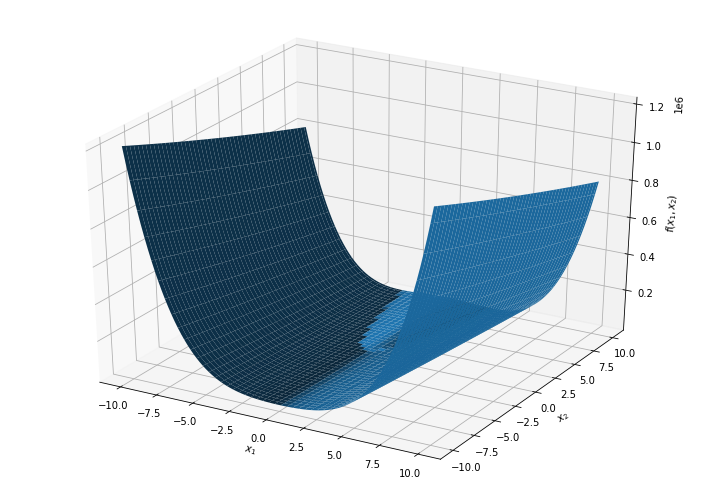

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_surface(x1, x2, y)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
# split training and test
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    y.flatten(), 
    test_size=0.2, 
    random_state=42
)

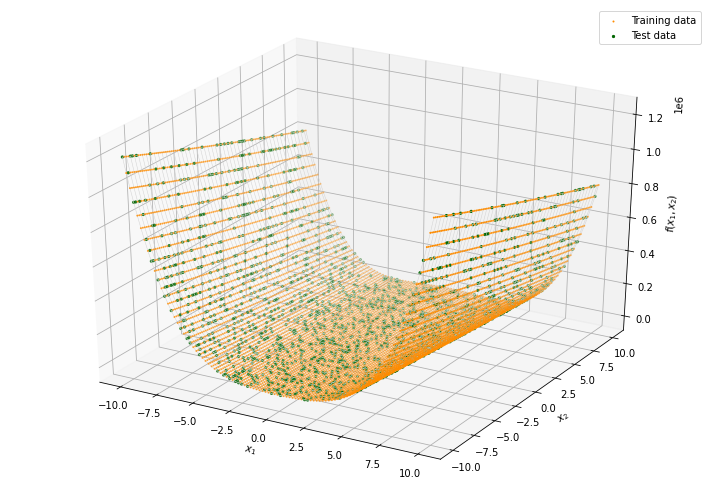

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# created scaler
scaler = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# fit normalizer on training dataset
scaler.fit(y_train)
 
# transform training dataset
y_train = scaler.transform(y_train)
 
# transform test dataset
y_test = scaler.transform(y_test)

In [ ]:
# verifying shapes
print("X train shape: ", x_train.shape)
print("Y train shape: ", y_train.shape)
print("X test shape: ", x_test.shape)
print("Y test shape: ", y_test.shape)

X train shape:  (8000, 2)
Y train shape:  (8000, 1)
X test shape:  (2000, 2)
Y test shape:  (2000, 1)


In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
900/900 [==============================] - 2s 1ms/step - loss: 0.2403 - val_loss: 0.0481 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0301 - val_loss: 0.0225 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0200 - val_loss: 0.0144 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0144 - val_loss: 0.0141 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0098 - val_loss: 0.0073 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0094 - val_loss: 0.0056 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0102 - val_loss: 0.0024 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0082 - val_loss: 0.0071 - lr: 0.0010
Epoch 9/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.00

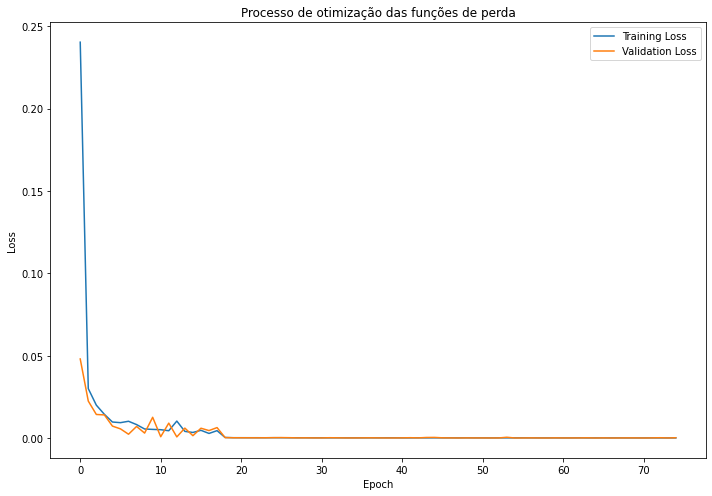

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
predictions = mlp.predict(x_test)
inverse_predictions = scaler.inverse_transform(predictions)

63/63 [==============================] - 0s 996us/step


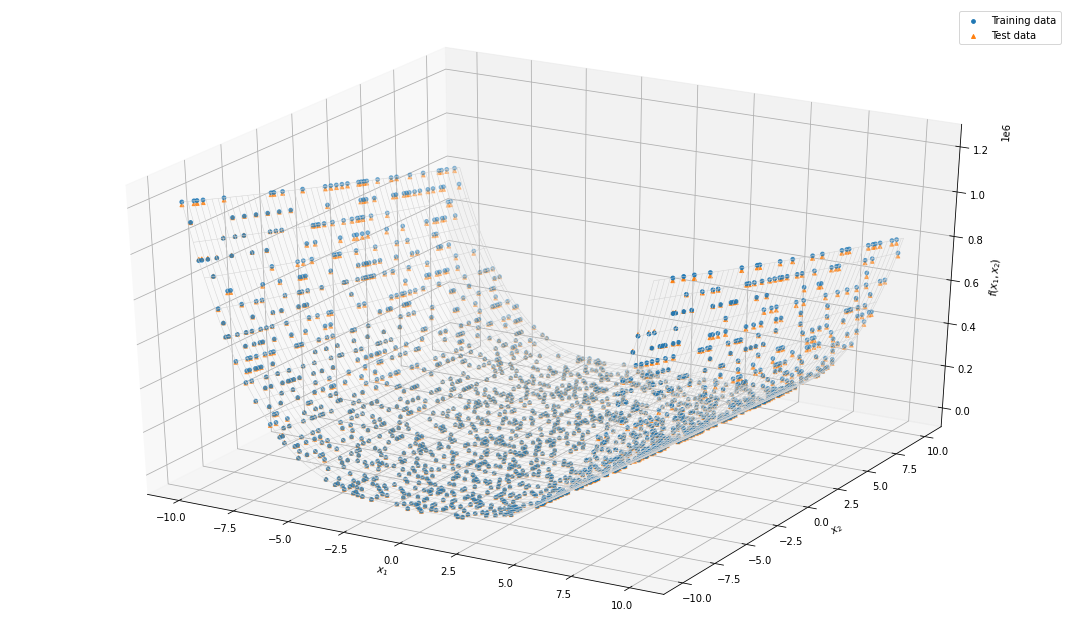

In [ ]:
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], scaler.inverse_transform(y_test), s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], inverse_predictions, s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mse = mean_squared_error(scaler.inverse_transform(y_test), inverse_predictions)
rmse = mean_squared_error(scaler.inverse_transform(y_test), inverse_predictions, squared=False)
mae = mean_absolute_error(scaler.inverse_transform(y_test), inverse_predictions)

In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 16880097.554985106
Root Mean Squared Error: 4108.5395890736045
Mean Absolute Error: 2477.902080862183


## b)
$x_1^2 + x_2^2 + 2x_1x_2cos(\pi x_1x_2) + x_1 + x_2 -1$ com $|x_1| ≤1 , |x_2| ≤ 1$

In [ ]:
# function's definition
def g(x1,x2):
  return x1**2 + x2**2 + 2 * x1 * x2 * np.cos(np.pi * x1 * x2) + x1 + x2 - 1

In [ ]:
# generating points
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
y = g(x1,x2)

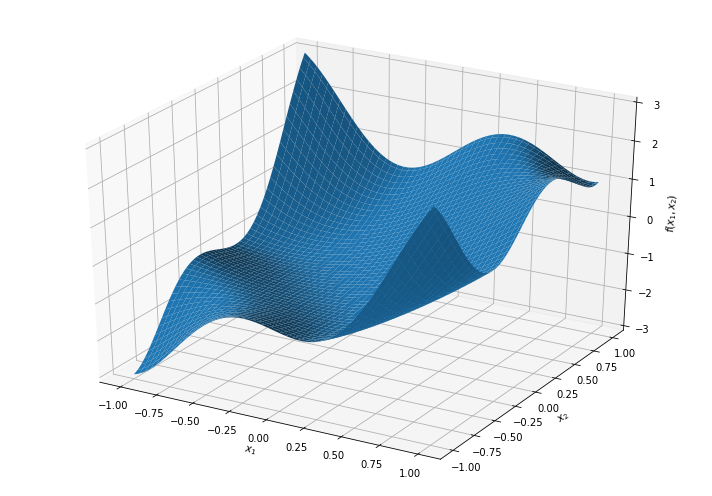

In [ ]:
# plotting surface
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))
ax.plot_surface(x1, x2, y)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [ ]:
# split train test
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    y.flatten(), 
    test_size=0.2, 
    random_state=505
)

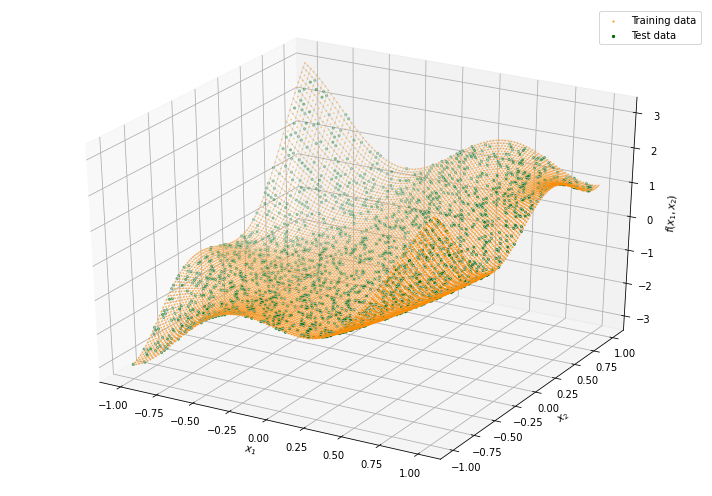

In [ ]:
# surface os points to test and to train
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_train[:,0], x_train[:,1], y_train, s=1, color='darkorange', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=5, color='darkgreen', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                                 
 dense_21 (Dense)            (None, 8)                 136       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-traina

In [ ]:
# training the model
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
900/900 [==============================] - 2s 1ms/step - loss: 0.3755 - val_loss: 0.1831 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.1221 - val_loss: 0.0754 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0488 - val_loss: 0.0392 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0238 - val_loss: 0.0227 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0188 - val_loss: 0.0208 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0147 - val_loss: 0.0175 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0147 - val_loss: 0.0202 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.0169 - val_loss: 0.0165 - lr: 0.0010
Epoch 9/2000
900/900 [==============================] - 1s 1ms/step - loss: 0.01

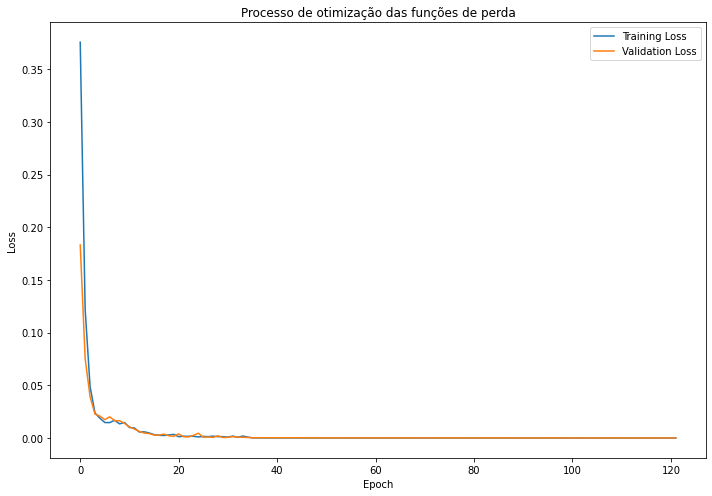

In [ ]:
# plotting loss function
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

63/63 [==============================] - 0s 1ms/step


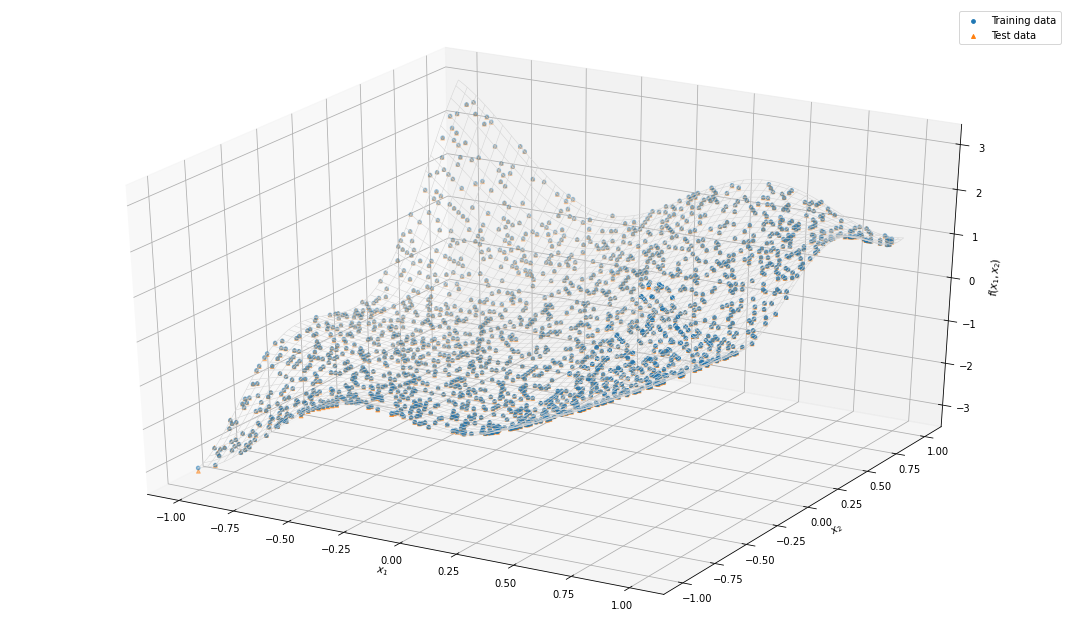

In [ ]:
# true points and predicted points
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(projection='3d'))

ax.plot_wireframe(x1, x2, y, linewidths=0.5, color='lightgrey')
ax.scatter(x_test[:,0], x_test[:,1], y_test, s=14, color='C0', label='Training data')
ax.scatter(x_test[:,0], x_test[:,1], mlp.predict(x_test), s=15, marker='^', color='C1', label='Test data')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, mlp.predict(x_test))
rmse = mean_squared_error(y_test, mlp.predict(x_test), squared=False)
mae = mean_absolute_error(y_test, mlp.predict(x_test))

63/63 [==============================] - 0s 763us/step


In [ ]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 4.9327674554969855e-05
Root Mean Squared Error: 0.007023366326411421
Mean Absolute Error: 0.0053168037015980385


# Questão 2

Considere o problema de classificação de padrões bidimensionais constituído neste caso de 5 padrões. A distribuição dos padrões tem como base um quadrado centrado na origem interceptando os eixos nos pontos +1 e -1 de cada eixo. Os pontos +1 e -1 de cada eixo são centros de quatro semicírculos que se interceptam no interior do quadrado originando as classes 1,2,3,4 e a outra classe corresponde as regiões de não interseção. Após gerar aleato- riamente os dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação com o rótulo de cada classe. Solucione este problema considerando uma rede perceptron de múltiplas camada. Apresente na solução a curva do erro médio de treinamento e a curva do erro médio de teste. Apresente também a matriz de confusão.

## Semicircle equations

<center>
<img width="400" src="https://drive.google.com/uc?export=view&id=1t7pDGAQgmUBkUQEj_ht4pyafuYEmNs5u">

Gráfico das equações descritas abaixo:

<img width="200" src="https://drive.google.com/uc?export=view&id=1KjAzMu_V0EQyhhnf2KH5JJK8C-xwRqnG">

</center>

In [ ]:
# Semicírculo azul
def c1(x, y):
    if (x + 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Sermicírculo verde
def c2(x, y):
    if (x - 1)**2 + y**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo amarelo
def c3(x, y):
    if x**2 + (y + 1)**2 <= 1:
      return 1
    else:
      return 0

#Semicírculo vermelha=o
def c4(x, y):
    if x**2 + (y - 1)**2 <= 1:
      return 1
    else:
      return 0

### Classificando os pontos 

*   Classe 0: região de fora
*   Classe 1: região dentro dos semicírculos azul e vermelho
*   Classe 2: região dentro dos semicírculos verde e vermelho
*   Classe 3: região dentro dos semicírculos verde e amarelo
*   Classe 4: região dentro dos semicírculos azul e amarelo

In [ ]:
x, y = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

points = np.vstack(list(zip(x.ravel(), y.ravel())))

lista = []
for x_i, y_i in points:
  if c1(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(1)
  elif c2(x_i, y_i) + c4(x_i, y_i) == 2:
    lista.append(2)
  elif c2(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(3)
  elif c1(x_i, y_i) + c3(x_i, y_i) == 2:
    lista.append(4)
  else:
    lista.append(0)

labels = np.array(lista)

## Train test split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, stratify=labels)

In [ ]:
print(f"shape x train: {x_train.shape}")
print(f"shape y train: {y_train.shape}")
print(f"shape x test: {x_test.shape}")
print(f"shape y test: {y_test.shape}")

shape x train: (8000, 2)
shape y train: (8000,)
shape x test: (2000, 2)
shape y test: (2000,)


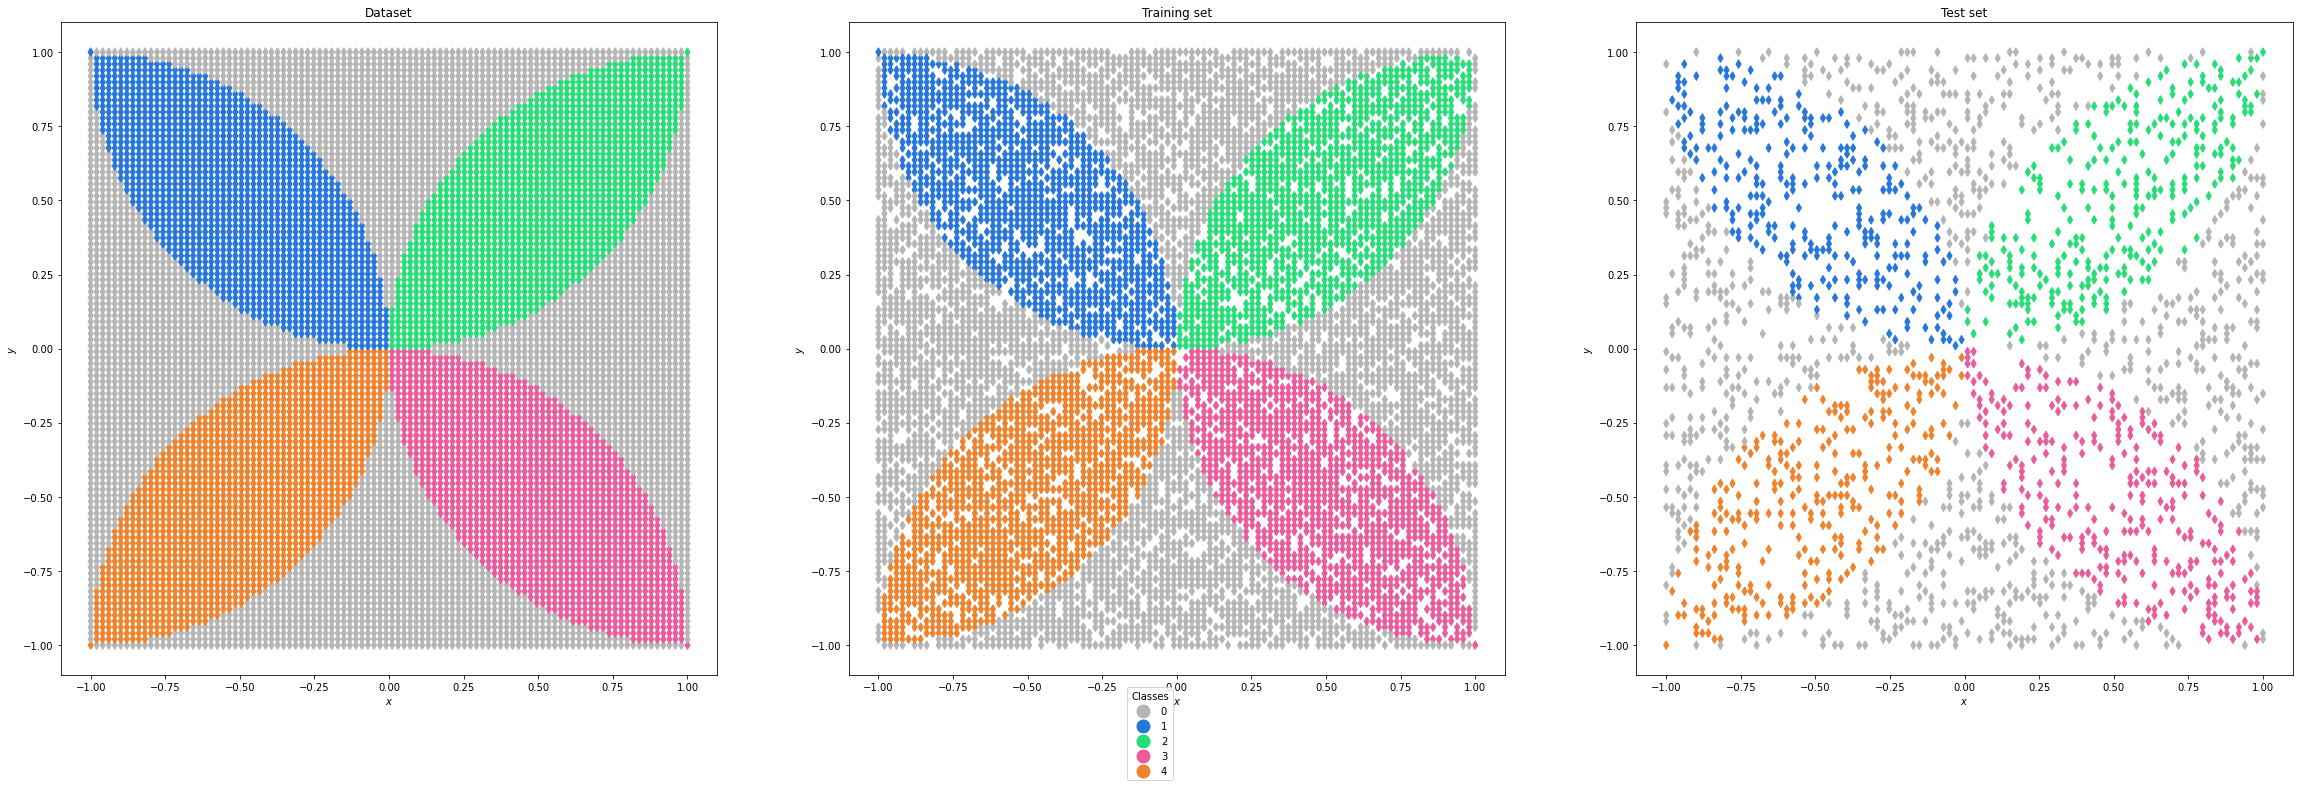

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(40, 12))

color1 = (181/255, 181/255, 181/255, 1.0)
color2 = (38/255, 118/255, 222/255, 1.0)
color3 = (38/255, 222/255, 118/255, 1.0)
color4 = (235/255, 91/255, 156/255, 1.0)
color5 = (240/255, 130/255, 44/255, 1.0)

colormap = np.array([color1, color2, color3, color4, color5])

dataset_scatter = ax[0].scatter(points[:,0], points[:,1], c=colormap[labels], marker='d')

ax[0].set(
    title='Dataset',
    xlabel='$x$',
    ylabel='$y$'
)

ax[1].scatter(x_train[:,0], x_train[:,1], c=colormap[y_train], marker='d')

ax[1].set(
    title='Training set',
    xlabel='$x$',
    ylabel='$y$'
)

ax[2].scatter(x_test[:,0], x_test[:,1], c=colormap[y_test], marker='d')

ax[2].set(
    title='Test set',
    xlabel='$x$',
    ylabel='$y$'
)

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(181/255, 181/255, 181/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 118/255, 222/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(38/255, 222/255, 118/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(235/255, 91/255, 156/255), markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Scatter', markerfacecolor=(240/255, 130/255, 44/255), markersize=15)
]

fig.legend(
    legend_elements,
    ['0', '1', '2', '3', '4'],
    loc='lower center',
    title='Classes'
)

plt.show()

## Define the model

In [ ]:
mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='softmax')
])

mlp.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)


mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                192       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 5)                 45        
                                                                 
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [ ]:
history = mlp.fit(
    x_train, y_train.reshape((-1,1)),
    validation_split=0.1,
    batch_size=10,
    epochs=2000,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.7271 - acc: 0.6861 - val_loss: 0.4313 - val_acc: 0.8350 - lr: 0.0010
Epoch 2/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.3175 - acc: 0.8826 - val_loss: 0.2762 - val_acc: 0.8975 - lr: 0.0010
Epoch 3/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.2327 - acc: 0.9156 - val_loss: 0.2305 - val_acc: 0.9125 - lr: 0.0010
Epoch 4/2000
720/720 [==============================] - 2s 3ms/step - loss: 0.1948 - acc: 0.9292 - val_loss: 0.1951 - val_acc: 0.9162 - lr: 0.0010
Epoch 5/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.1680 - acc: 0.9410 - val_loss: 0.1584 - val_acc: 0.9438 - lr: 0.0010
Epoch 6/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.1588 - acc: 0.9375 - val_loss: 0.1548 - val_acc: 0.9375 - lr: 0.0010
Epoch 7/2000
720/720 [==============================] - 2s 2ms/step - loss: 0.1468 - acc: 0.9440 - val_loss: 0.1422 - 

## Evaluation

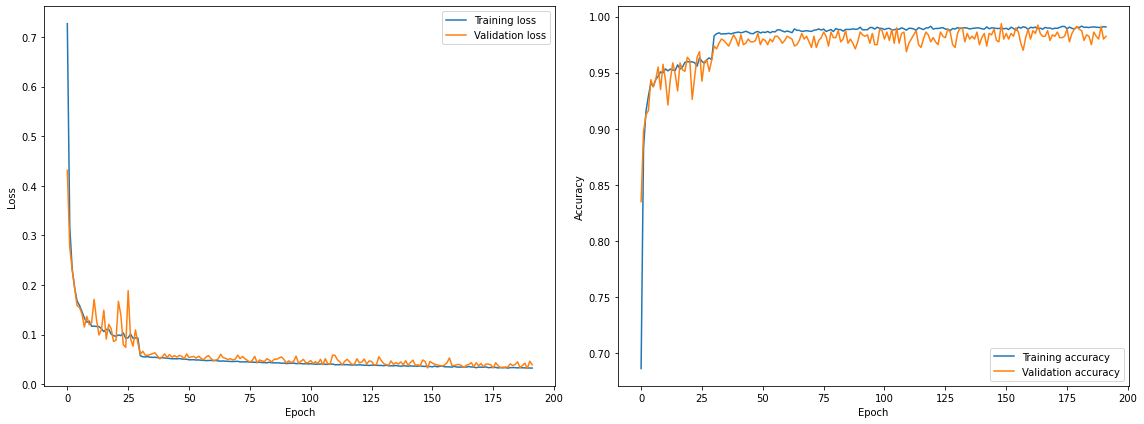

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(history.history['loss'], label='Training loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(history.history['acc'], label='Training accuracy')
ax[1].plot(history.history['val_acc'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
predictions = [np.argmax(p) for p in mlp.predict(x_test)]

63/63 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       884
           1       0.98      0.99      0.98       279
           2       1.00      0.98      0.99       279
           3       0.98      1.00      0.99       279
           4       0.99      1.00      0.99       279

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



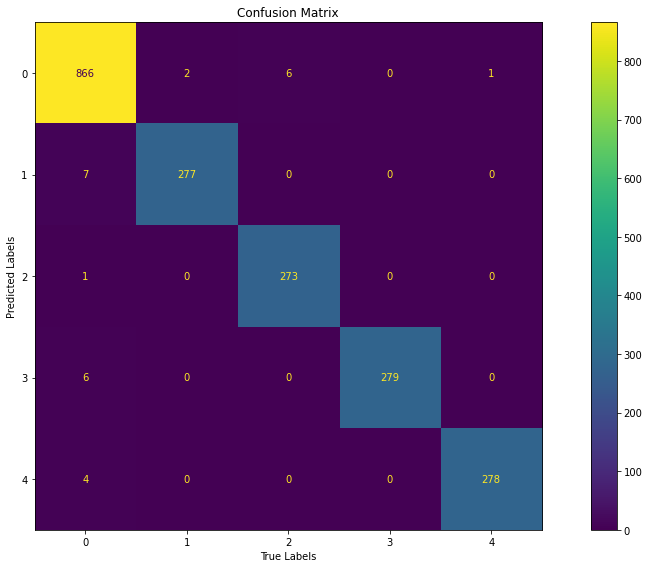

In [ ]:
fig, ax = plt.subplots(figsize=(14, 8))

ConfusionMatrixDisplay(confusion_matrix(predictions, y_test)).plot(values_format='.0f', ax=ax)

ax.set(
    title='Confusion Matrix',
    xlabel='True Labels',
    ylabel='Predicted Labels'
)

plt.tight_layout()
plt.show()

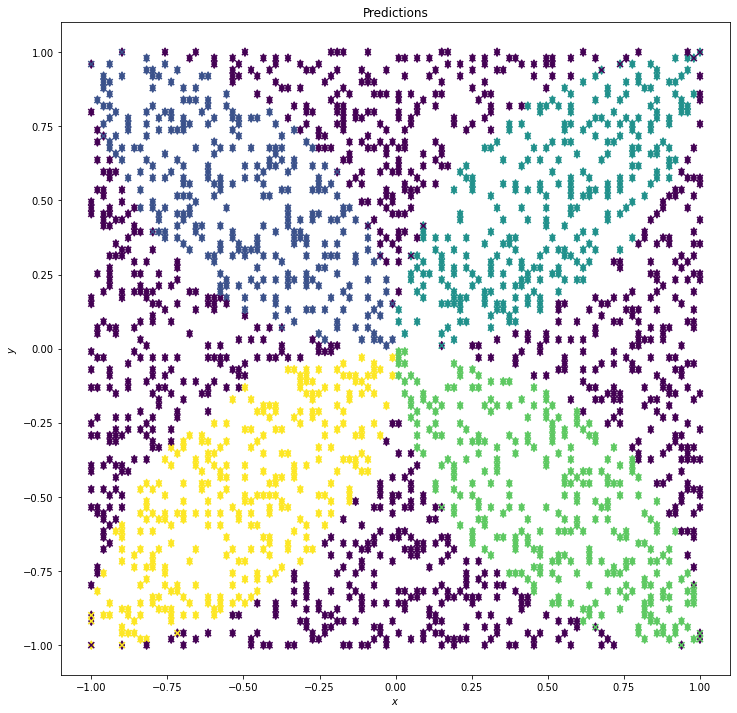

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(x_test[:,0], x_test[:,1], c=y_test, marker='d')

ax.scatter(x_test[:,0], x_test[:,1], c=predictions, marker='x')

ax.set(
    title='Predictions',
    xlabel='$x$',
    ylabel='$y$'
)


plt.show()

# Questão 3

Considere uma rede deep learning convolutiva (treinada) aplicada à classificação de padrões em imagens. A base de dados considerada é a CIFAR-10 (pesquise). A referida base de dados consiste de 60 mil imagens coloridas de 32x32 pixels, com 50 mil para treino e 10 mil para teste. As imagens estão divididas em 10 classes, a saber: avião, navio, cami- nhão, automóvel, sapo, pássaro, cachorro, gato, cavalo e cervo. Cada imagem possui apenas um dos objetos da classe de interesse, podendo estar parcialmente obstruído por outros ob- jetos que não pertençam a esse conjunto. Apresente os resultados da classificação em uma matriz de confusão.

Este trabalho foi baseado no trabalho do CODERONIN1 do Kaggle
Link: https://www.kaggle.com/code/adi160/cifar-10-keras-transfer-learning 

In [ ]:
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.image as mpimg
import seaborn as sns
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# library for transfer learning
from keras.applications import VGG19,ResNet50

# data augumentation
from keras.preprocessing.image import ImageDataGenerator

# import dataset
from keras.datasets import cifar10

## Load dataset

In [ ]:
# load dataset and divide in train and teste datasets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print(f"shape x train: {x_train.shape}")
print(f"shape y train: {y_train.shape}")
print(f"shape x test: {x_test.shape}")
print(f"shape y test: {y_test.shape}")

shape x train: (50000, 32, 32, 3)
shape y train: (50000, 1)
shape x test: (10000, 32, 32, 3)
shape y test: (10000, 1)


In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
print(f"shape x train: {x_train.shape}")
print(f"shape y train: {y_train.shape}")
print(f"shape x test: {x_test.shape}")
print(f"shape y test: {y_test.shape}")

shape x train: (50000, 32, 32, 3)
shape y train: (50000, 10)
shape x test: (10000, 32, 32, 3)
shape y test: (10000, 10)


## Data Augmentation

In [ ]:
# Let's instantiate the object
train_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip=True,
                                    zoom_range=.1 )

test_generator = ImageDataGenerator(
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1)

In [ ]:
#Fit the augmentation method to the data
train_generator.fit(x_train)
test_generator.fit(x_test)

## Transfer Learning - VGG19

In [ ]:
lrr= ReduceLROnPlateau(
                       monitor='val_accuracy', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

### Importing

In [ ]:
# The first base model used is VGG19. 
# The pretrained weights from the imagenet challenge are used
base_vgg19 = VGG19(include_top=False,
                   input_shape=(32,32,3),
                   classes=y_train.shape[1],
                   weights='imagenet')

base_vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
vgg19 = Sequential()
vgg19.add(base_vgg19) 
vgg19.add(Flatten()) 

#Add the Dense layers along with activation and batch normalization
vgg19.add(Dense(1024,activation=('relu'),input_dim=512))
vgg19.add(Dense(512,activation=('relu'))) 
vgg19.add(Dense(256,activation=('relu'))) 
#model_1.add(Dropout(.3)) 
vgg19.add(Dense(128,activation=('relu')))
#model_1.add(Dropout(.2))
vgg19.add(Dense(10,activation=('softmax'))) 

vgg19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 1024)              525312    
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)               

### Training

In [ ]:
# hyperparameters
batch_size= 100
epochs=50

learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, 
          epsilon=None, decay=0.0, amsgrad=False)

vgg19.compile(optimizer=sgd,
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
vgg19.fit_generator(train_generator.flow(x_train,y_train,batch_size=batch_size),
                      epochs=epochs,
                      steps_per_epoch=x_train.shape[0]//batch_size,
                      validation_data=test_generator.flow(x_test,y_test,batch_size=batch_size),validation_steps=250,
                      callbacks=[lrr],verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


500/500 [==============================] - ETA: 0s - loss: 1.6137 - accuracy: 0.4008

500/500 [==============================] - 37s 73ms/step - loss: 1.6137 - accuracy: 0.4008 - val_loss: 1.0790 - val_accuracy: 0.6240 - lr: 0.0010
Epoch 2/50
500/500 [==============================] - ETA: 0s - loss: 0.8359 - accuracy: 0.7123

500/500 [==============================] - 32s 64ms/step - loss: 0.8359 - accuracy: 0.7123 - lr: 0.0010
Epoch 3/50
500/500 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.7799

500/500 [==============================] - 33s 65ms/step - loss: 0.6465 - accuracy: 0.7799 - lr: 0.0010
Epoch 4/50
500/500 [==============================] - ETA: 0s - loss: 0.5492 - accuracy: 0.8131

500/500 [==============================] - 32s 64ms/step - loss: 0.5492 - accuracy: 0.8131 - lr: 0.0010
Epoch 5/50
500/500 [==============================] - ETA: 0s - loss: 0.4832 - accuracy: 0.8365

500/500 [==============================] - 32s 64ms/step - loss: 0.4832 - accuracy: 0.8365 - lr: 0.0010
Epoch 6/50
500/500 [==============================] - ETA: 0s - loss: 0.4242 - accuracy: 0.8548

500/500 [==============================] - 32s 64ms/step - loss: 0.4242 - accuracy: 0.8548 - lr: 0.0010
Epoch 7/50
500/500 [==============================] - ETA: 0s - loss: 0.3861 - accuracy: 0.8667

500/500 [==============================] - 32s 64ms/step - loss: 0.3861 - accuracy: 0.8667 - lr: 0.0010
Epoch 8/50
500/500 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8775

500/500 [==============================] - 35s 70ms/step - loss: 0.3509 - accuracy: 0.8775 - lr: 0.0010
Epoch 9/50
500/500 [==============================] - ETA: 0s - loss: 0.3144 - accuracy: 0.8912

500/500 [==============================] - 32s 64ms/step - loss: 0.3144 - accuracy: 0.8912 - lr: 0.0010
Epoch 10/50
500/500 [==============================] - ETA: 0s - loss: 0.2832 - accuracy: 0.9022

500/500 [==============================] - 32s 64ms/step - loss: 0.2832 - accuracy: 0.9022 - lr: 0.0010
Epoch 11/50
500/500 [==============================] - ETA: 0s - loss: 0.2564 - accuracy: 0.9116

500/500 [==============================] - 32s 65ms/step - loss: 0.2564 - accuracy: 0.9116 - lr: 0.0010
Epoch 12/50
500/500 [==============================] - ETA: 0s - loss: 0.2257 - accuracy: 0.9214

500/500 [==============================] - 32s 65ms/step - loss: 0.2257 - accuracy: 0.9214 - lr: 0.0010
Epoch 13/50
500/500 [==============================] - ETA: 0s - loss: 0.2134 - accuracy: 0.9262

500/500 [==============================] - 32s 64ms/step - loss: 0.2134 - accuracy: 0.9262 - lr: 0.0010
Epoch 14/50
500/500 [==============================] - ETA: 0s - loss: 0.1928 - accuracy: 0.9343

500/500 [==============================] - 32s 65ms/step - loss: 0.1928 - accuracy: 0.9343 - lr: 0.0010
Epoch 15/50
500/500 [==============================] - ETA: 0s - loss: 0.1731 - accuracy: 0.9400

500/500 [==============================] - 32s 64ms/step - loss: 0.1731 - accuracy: 0.9400 - lr: 0.0010
Epoch 16/50
500/500 [==============================] - ETA: 0s - loss: 0.1550 - accuracy: 0.9474

500/500 [==============================] - 32s 64ms/step - loss: 0.1550 - accuracy: 0.9474 - lr: 0.0010
Epoch 17/50
500/500 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9514

500/500 [==============================] - 32s 65ms/step - loss: 0.1412 - accuracy: 0.9514 - lr: 0.0010
Epoch 18/50
500/500 [==============================] - ETA: 0s - loss: 0.1307 - accuracy: 0.9560

500/500 [==============================] - 32s 64ms/step - loss: 0.1307 - accuracy: 0.9560 - lr: 0.0010
Epoch 19/50
500/500 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9605

500/500 [==============================] - 32s 65ms/step - loss: 0.1171 - accuracy: 0.9605 - lr: 0.0010
Epoch 20/50
500/500 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9633

500/500 [==============================] - 32s 64ms/step - loss: 0.1071 - accuracy: 0.9633 - lr: 0.0010
Epoch 21/50
500/500 [==============================] - ETA: 0s - loss: 0.1004 - accuracy: 0.9654

500/500 [==============================] - 32s 65ms/step - loss: 0.1004 - accuracy: 0.9654 - lr: 0.0010
Epoch 22/50
500/500 [==============================] - ETA: 0s - loss: 0.0919 - accuracy: 0.9687

500/500 [==============================] - 32s 65ms/step - loss: 0.0919 - accuracy: 0.9687 - lr: 0.0010
Epoch 23/50
500/500 [==============================] - ETA: 0s - loss: 0.0862 - accuracy: 0.9704

500/500 [==============================] - 34s 68ms/step - loss: 0.0862 - accuracy: 0.9704 - lr: 0.0010
Epoch 24/50
500/500 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9743

500/500 [==============================] - 32s 65ms/step - loss: 0.0761 - accuracy: 0.9743 - lr: 0.0010
Epoch 25/50
500/500 [==============================] - ETA: 0s - loss: 0.0703 - accuracy: 0.9761

500/500 [==============================] - 32s 64ms/step - loss: 0.0703 - accuracy: 0.9761 - lr: 0.0010
Epoch 26/50
500/500 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.9768

500/500 [==============================] - 32s 64ms/step - loss: 0.0664 - accuracy: 0.9768 - lr: 0.0010
Epoch 27/50
500/500 [==============================] - ETA: 0s - loss: 0.0601 - accuracy: 0.9798

500/500 [==============================] - 32s 65ms/step - loss: 0.0601 - accuracy: 0.9798 - lr: 0.0010
Epoch 28/50
500/500 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9802

500/500 [==============================] - 32s 64ms/step - loss: 0.0578 - accuracy: 0.9802 - lr: 0.0010
Epoch 29/50
500/500 [==============================] - ETA: 0s - loss: 0.0568 - accuracy: 0.9805

500/500 [==============================] - 32s 64ms/step - loss: 0.0568 - accuracy: 0.9805 - lr: 0.0010
Epoch 30/50
500/500 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9842

500/500 [==============================] - 32s 65ms/step - loss: 0.0488 - accuracy: 0.9842 - lr: 0.0010
Epoch 31/50
500/500 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9842

500/500 [==============================] - 32s 64ms/step - loss: 0.0475 - accuracy: 0.9842 - lr: 0.0010
Epoch 32/50
500/500 [==============================] - ETA: 0s - loss: 0.0455 - accuracy: 0.9844

500/500 [==============================] - 32s 64ms/step - loss: 0.0455 - accuracy: 0.9844 - lr: 0.0010
Epoch 33/50
500/500 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9855

500/500 [==============================] - 32s 65ms/step - loss: 0.0433 - accuracy: 0.9855 - lr: 0.0010
Epoch 34/50
500/500 [==============================] - ETA: 0s - loss: 0.0404 - accuracy: 0.9866

500/500 [==============================] - 32s 65ms/step - loss: 0.0404 - accuracy: 0.9866 - lr: 0.0010
Epoch 35/50
500/500 [==============================] - ETA: 0s - loss: 0.0433 - accuracy: 0.9849

500/500 [==============================] - 32s 64ms/step - loss: 0.0433 - accuracy: 0.9849 - lr: 0.0010
Epoch 36/50
500/500 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.9876

500/500 [==============================] - 32s 65ms/step - loss: 0.0367 - accuracy: 0.9876 - lr: 0.0010
Epoch 37/50
500/500 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9895

500/500 [==============================] - 32s 64ms/step - loss: 0.0306 - accuracy: 0.9895 - lr: 0.0010
Epoch 38/50
500/500 [==============================] - ETA: 0s - loss: 0.0300 - accuracy: 0.9896

500/500 [==============================] - 32s 65ms/step - loss: 0.0300 - accuracy: 0.9896 - lr: 0.0010
Epoch 39/50
500/500 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9892

500/500 [==============================] - 32s 65ms/step - loss: 0.0328 - accuracy: 0.9892 - lr: 0.0010
Epoch 40/50
500/500 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9912

500/500 [==============================] - 32s 65ms/step - loss: 0.0263 - accuracy: 0.9912 - lr: 0.0010
Epoch 41/50
500/500 [==============================] - ETA: 0s - loss: 0.0276 - accuracy: 0.9909

500/500 [==============================] - 32s 64ms/step - loss: 0.0276 - accuracy: 0.9909 - lr: 0.0010
Epoch 42/50
500/500 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9908

500/500 [==============================] - 33s 65ms/step - loss: 0.0274 - accuracy: 0.9908 - lr: 0.0010
Epoch 43/50
500/500 [==============================] - ETA: 0s - loss: 0.0267 - accuracy: 0.9907

500/500 [==============================] - 32s 65ms/step - loss: 0.0267 - accuracy: 0.9907 - lr: 0.0010
Epoch 44/50
500/500 [==============================] - ETA: 0s - loss: 0.0308 - accuracy: 0.9895

500/500 [==============================] - 32s 65ms/step - loss: 0.0308 - accuracy: 0.9895 - lr: 0.0010
Epoch 45/50
500/500 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.9914

500/500 [==============================] - 32s 64ms/step - loss: 0.0257 - accuracy: 0.9914 - lr: 0.0010
Epoch 46/50
500/500 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9930

500/500 [==============================] - 32s 64ms/step - loss: 0.0220 - accuracy: 0.9930 - lr: 0.0010
Epoch 47/50
500/500 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9928

500/500 [==============================] - 32s 65ms/step - loss: 0.0216 - accuracy: 0.9928 - lr: 0.0010
Epoch 48/50
500/500 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9928

500/500 [==============================] - 32s 64ms/step - loss: 0.0211 - accuracy: 0.9928 - lr: 0.0010
Epoch 49/50
500/500 [==============================] - ETA: 0s - loss: 0.0216 - accuracy: 0.9926

500/500 [==============================] - 33s 65ms/step - loss: 0.0216 - accuracy: 0.9926 - lr: 0.0010
Epoch 50/50
500/500 [==============================] - ETA: 0s - loss: 0.0230 - accuracy: 0.9920

500/500 [==============================] - 32s 64ms/step - loss: 0.0230 - accuracy: 0.9920 - lr: 0.0010


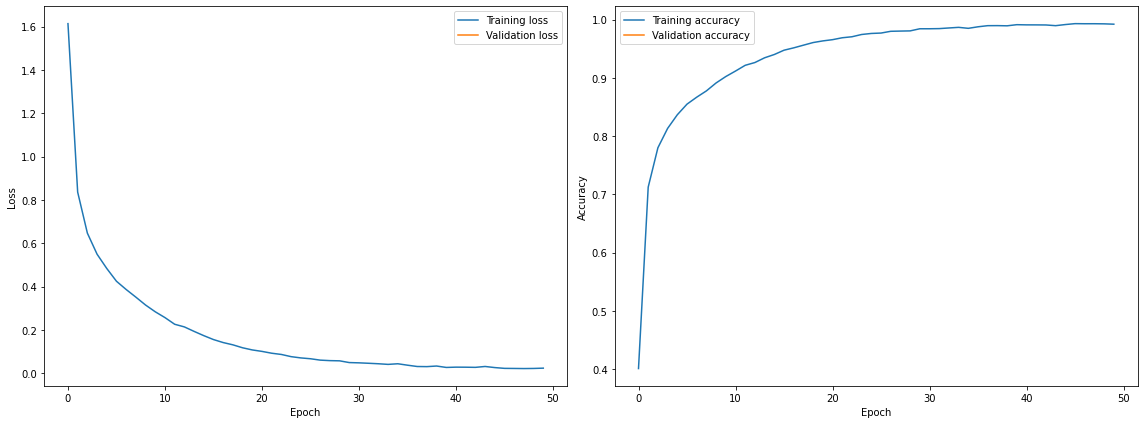

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6))

ax[0].plot(vgg19.history.history['loss'], label='Training loss')
ax[0].plot(vgg19.history.history['val_loss'], label='Validation loss')

ax[0].legend()
ax[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)

ax[1].plot(vgg19.history.history['accuracy'], label='Training accuracy')
ax[1].plot(vgg19.history.history['val_accuracy'], label='Validation accuracy')

ax[1].set(
    ylabel='Accuracy',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

### Evaluation

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
y_pred = vgg19.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true,y_pred)

313/313 [==============================] - 4s 10ms/step


In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Confusion matrix, without normalization


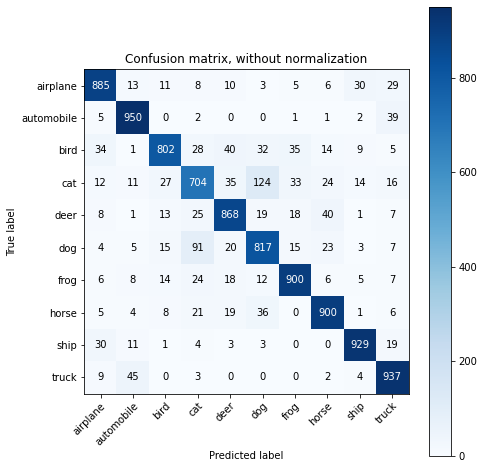

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


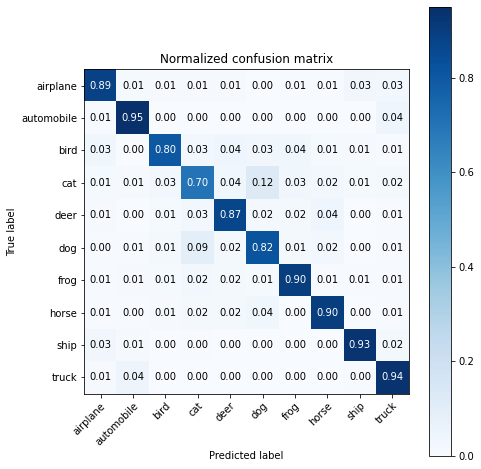

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
# plt.show()

In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.89      0.89      0.89      1000
  automobile       0.91      0.95      0.93      1000
        bird       0.90      0.80      0.85      1000
         cat       0.77      0.70      0.74      1000
        deer       0.86      0.87      0.86      1000
         dog       0.78      0.82      0.80      1000
        frog       0.89      0.90      0.90      1000
       horse       0.89      0.90      0.89      1000
        ship       0.93      0.93      0.93      1000
       truck       0.87      0.94      0.90      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Questão 4

Utilize a rede neural perceptron de múltiplas camadas do tipo NARX (rede recorrente) para fazer a predição de um passo $x^{(n+1)}$ da série temporal $x(n) = 1 + cos(n + cos^2(n))$, n=0,1,2,3,.... Gere inicialmente um conjunto de amostras para o treinamento, definindo o erro de predição como $e^{(n+1)}=x(n+1)-x^{(n+1)}$. Avalie o desempenho mostrando a curva a série temporal, a curva de predição o e curva do erro de predição.

In [2]:
from tensorflow.keras.layers import Dense, Reshape, Flatten, Dropout, Activation, BatchNormalization, LSTM, Embedding, Input
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
# defining function
def f(x):
  return 1 + np.cos(x + (np.cos(x))**2)

In [4]:
x = np.linspace(0, 100, 10000)
y = [f(i) for i in x]

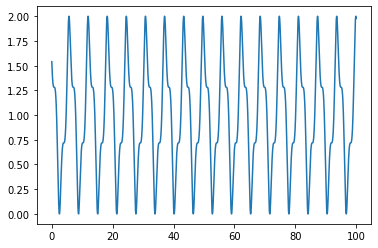

In [5]:
# plot data
points = 10000
plt.plot(x[:points], y[:points])
plt.show()

In [6]:
# splitting data into training and testing
test_size = 2000
x_train = x[:-test_size]
y_train = y[:-test_size]
x_test = x[-test_size:]
y_test = y[-test_size:]

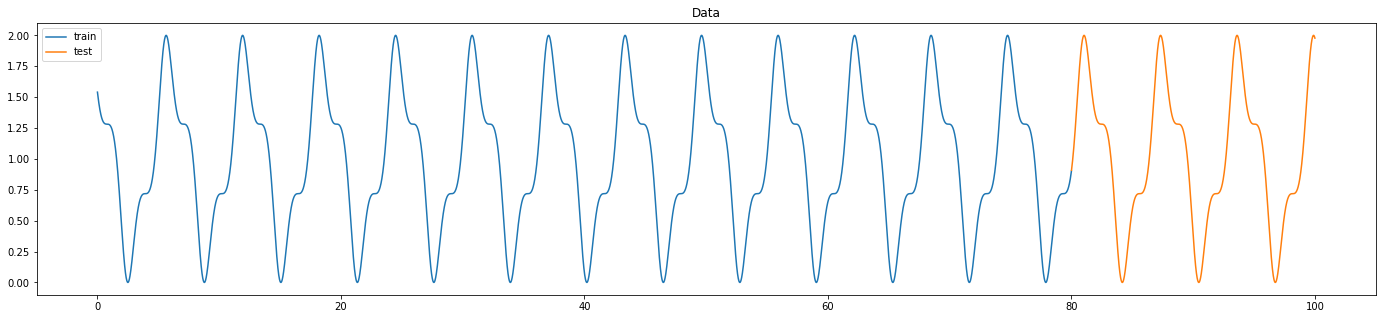

In [9]:
# plot data
fig, axes = plt.subplots(ncols=1, figsize=(24, 5))
axes.plot(x_train, y_train, label='train')
axes.plot(x_test, y_test, label='test')
axes.set_title('Data')
axes.legend()
plt.show()

In [11]:
sequence_x = list(TimeseriesGenerator(x_train, x_train, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(x_train[4:], x_train[4:], 3, batch_size=1))

train_seqs = []
y_train = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    train_seqs.append(seq)
    y_train.append(next_x)

train_seqs = np.array(train_seqs)
y_train = np.array(y_train)

In [12]:
sequence_x = list(TimeseriesGenerator(x_test, x_test, 4, batch_size=1))
sequence_y = list(TimeseriesGenerator(x_test[4:], x_test[4:], 3, batch_size=1))

test_seqs = []
y_test = []
for (x_seq, next_x), (next_seq, _) in zip(sequence_x, sequence_y):
    seq = np.append(x_seq.reshape(4,), next_seq.reshape(3, ))
    
    test_seqs.append(seq)
    y_test.append(next_x)

test_seqs = np.array(test_seqs)
y_test = np.array(y_test)

In [15]:
# building the model
model = Sequential([
    LSTM(128, input_shape=(7, 1), return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

model.compile(loss="mean_absolute_error", optimizer="rmsprop")

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 7, 128)            66560     
                                                                 
 lstm_10 (LSTM)              (None, 7, 64)             49408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 128,417
Trainable params: 128,417
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Training the model
history = model.fit(
    train_seqs, y_train,
    validation_split=0.1,
    batch_size=8,
    epochs=350,
    shuffle=True,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/350
900/900 [==============================] - 15s 13ms/step - loss: 19.2268 - val_loss: 42.0530 - lr: 0.0010
Epoch 2/350
900/900 [==============================] - 10s 11ms/step - loss: 5.9539 - val_loss: 21.8673 - lr: 0.0010
Epoch 3/350
900/900 [==============================] - 10s 11ms/step - loss: 1.8953 - val_loss: 11.9836 - lr: 0.0010
Epoch 4/350
900/900 [==============================] - 12s 13ms/step - loss: 1.0453 - val_loss: 7.9481 - lr: 0.0010
Epoch 5/350
900/900 [==============================] - 11s 12ms/step - loss: 0.8444 - val_loss: 6.3535 - lr: 0.0010
Epoch 6/350
900/900 [==============================] - 10s 11ms/step - loss: 0.7501 - val_loss: 5.6213 - lr: 0.0010
Epoch 7/350
900/900 [==============================] - 9s 10ms/step - loss: 0.6863 - val_loss: 5.3713 - lr: 0.0010
Epoch 8/350
900/900 [==============================] - 12s 13ms/step - loss: 0.6383 - val_loss: 5.0735 - lr: 0.0010
Epoch 9/350
900/900 [==============================] - 11s 12ms/step 

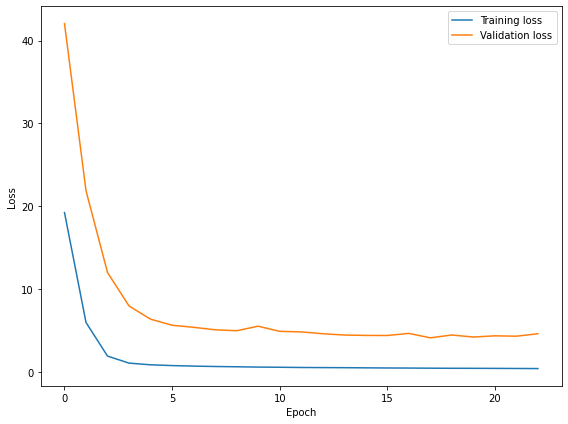

In [17]:
# plotting loss
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(history.history['loss'], label='Training loss')
ax.plot(history.history['val_loss'], label='Validation loss')

ax.legend()
ax.set(
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# predicting
y_pred = model.predict(test_seqs)

63/63 [==============================] - 1s 5ms/step


In [19]:
erro = y_test - y_pred

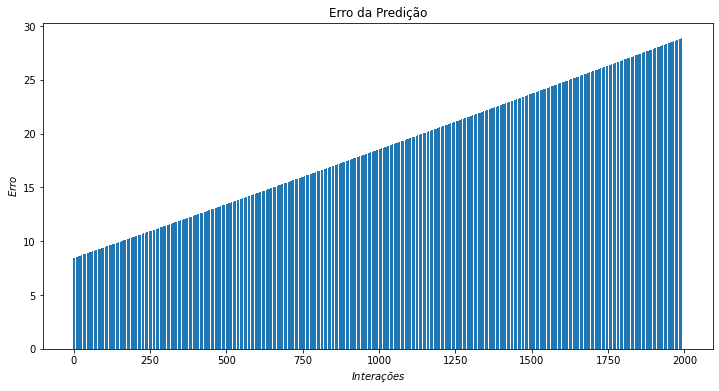

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(
    x=range(len(erro)),
    height=erro.flatten()
)

ax.set(
    title='Erro da Predição',
    ylabel='$Erro$',
    xlabel='$Interações$'
)
plt.show()

# Questão 5

Considere quatro distribuições gaussianas, $C_1, C_2, C_3, C_4$, em um espaço de entrada de dimensionalidade igual a oito, isto é x = ($x_1, x_2, ..., x_8)^t$ .Todas as nuvens de dados formadas têm variâncias unitária, mas centros ou vetores média são diferentes e dados por $m_1 = (0,0,0,0,0,0,0,0)^t , m_2 = (4,0,0,0,0,0,0,0)^t, m_3 = (0,0,0,4,0,0,0,0)^t, m_4 = (0,0,0,0,0,0,0,4)^t $.

Utilize uma rede de autoeconders para reduzir a dimensionalidade dos dados para duas di- mensões. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2. Esboce os dados neste novo espaço.

Observação: Gere inicialmente os dados em dimensão oito para cada uma das distribuições gaussianas. Selecione o conjunto de treinamento. Defina uma rede de autoencoder com uma arquitetura por exemplo do tipo 8:2:8 ou outro equivalente com mais camadas mas que reduza para 2 dimensões. Após o treinamento faça a redução de dimensionalidade com a rede de arquitetura 8:2 por exemplo.

In [21]:
from tensorflow.keras import Model

In [22]:
# generate four gaussian distributions with 8 dimensions, mean m1 = (0,0,0,0,0,0,0,0), m2 = (4,0,0,0,0,0,0,0), m3 = (0,0,0,4,0,0,0,0), m4 = (0,0,0,0,0,0,0,4) and covariance matrix I
m1 = np.zeros(8)
m2 = np.array([4,0,0,0,0,0,0,0])
m3 = np.array([0,0,0,4,0,0,0,0])
m4 = np.array([0,0,0,0,0,0,0,4])
I = np.eye(8)
x1 = np.random.multivariate_normal(m1, I, 15000)
x2 = np.random.multivariate_normal(m2, I, 15000)
x3 = np.random.multivariate_normal(m3, I, 15000)
x4 = np.random.multivariate_normal(m4, I, 15000)

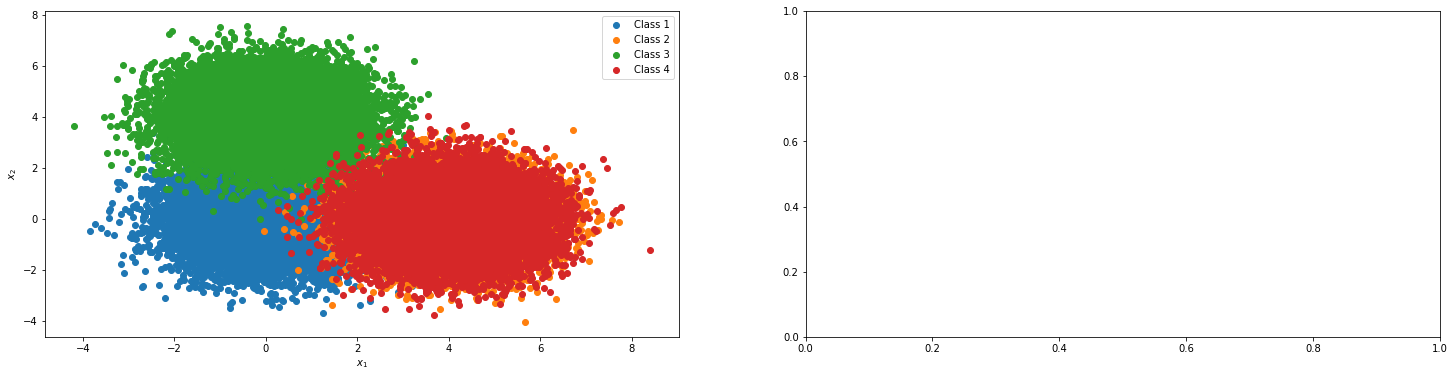

In [23]:
# plot the data
fig, axes = plt.subplots(ncols=2, figsize=(25, 6))
axes[0].scatter(x1[:,0], x1[:,1], label='Class 1')
axes[0].scatter(x2[:,0], x2[:,1], label='Class 2')
axes[0].scatter(x3[:,4], x3[:,3], label='Class 3')
axes[0].scatter(x4[:,-1], x4[:,-2], label='Class 4')
axes[0].legend()
axes[0].set(
    ylabel='$x_2$',
    xlabel='$x_1$'
)
plt.show()

In [35]:
# create an autoencoder netork to reduce the dimensionality of the data to 2 and plot the data
input_dim = Input(shape=(8,))
encoded = Dense(8, activation='leaky_relu')(input_dim)
encoded = Dense(4, activation='leaky_relu')(encoded)
encoded = Dense(2, activation='leaky_relu')(encoded)
decoded = Dense(4, activation='leaky_relu')(encoded)
decoded = Dense(8, activation='leaky_relu')(decoded)

autoencoder = Model(input_dim, decoded)
encoder = Model(input_dim, encoded)

In [36]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
autoencoder.compile(optimizer=opt, loss='mean_squared_error')

# fitting the model
history1 = autoencoder.fit(x1, x1, epochs=50, shuffle=True, validation_split=0.1)
history2 = autoencoder.fit(x2, x2, epochs=50, shuffle=True, validation_split=0.1)
history3 = autoencoder.fit(x3, x3, epochs=50, shuffle=True, validation_split=0.1)
history4 = autoencoder.fit(x4, x4, epochs=50, shuffle=True, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 1s 2ms/step - loss: 0.9627 - val_loss: 0.9539
Epoch 2/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9439 - val_loss: 0.9409
Epoch 3/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9354 - val_loss: 0.9344
Epoch 4/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9297 - val_loss: 0.9282
Epoch 5/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9237 - val_loss: 0.9208
Epoch 6/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9162 - val_loss: 0.9117
Epoch 7/50
422/422 [==============================] - 1s 1ms/step - loss: 0.9075 - val_loss: 0.9017
Epoch 8/50
422/422 [==============================] - 1s 1ms/step - loss: 0.8981 - val_loss: 0.8916
Epoch 9/50
422/422 [==============================] - 1s 1ms/step - loss: 0.8890 - val_loss: 0.8830
Epoch 10/50
422/422 [==============================] - 1s 1ms/step - loss: 0.8812 - val_loss: 0.8763

In [37]:
encoded_x1 = encoder.predict(x1)
encoded_x2 = encoder.predict(x2)
encoded_x3 = encoder.predict(x3)
encoded_x4 = encoder.predict(x4)

469/469 [==============================] - 0s 749us/step


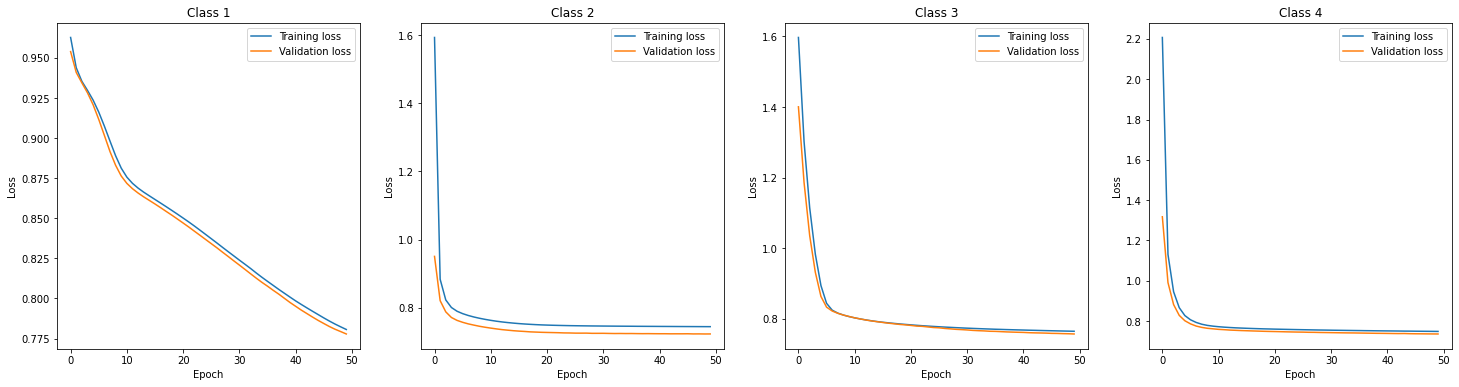

In [38]:
# plot history
fig, axes = plt.subplots(ncols=4, figsize=(25, 6))
axes[0].plot(history1.history['loss'], label='Training loss')
axes[0].plot(history1.history['val_loss'], label='Validation loss')
axes[1].plot(history2.history['loss'], label='Training loss')
axes[1].plot(history2.history['val_loss'], label='Validation loss')
axes[2].plot(history3.history['loss'], label='Training loss')
axes[2].plot(history3.history['val_loss'], label='Validation loss')
axes[3].plot(history4.history['loss'], label='Training loss')
axes[3].plot(history4.history['val_loss'], label='Validation loss')
axes[0].legend()
axes[0].set_title('Class 1')
axes[0].set(
    ylabel='Loss',
    xlabel='Epoch'
)
axes[1].set_title('Class 2')
axes[1].legend()
axes[1].set(
    ylabel='Loss',
    xlabel='Epoch'
)
axes[2].set_title('Class 3')
axes[2].legend()
axes[2].set(
    ylabel='Loss',
    xlabel='Epoch'
)
axes[3].set_title('Class 4')
axes[3].legend()
axes[3].set(
    ylabel='Loss',
    xlabel='Epoch'
)
plt.show()

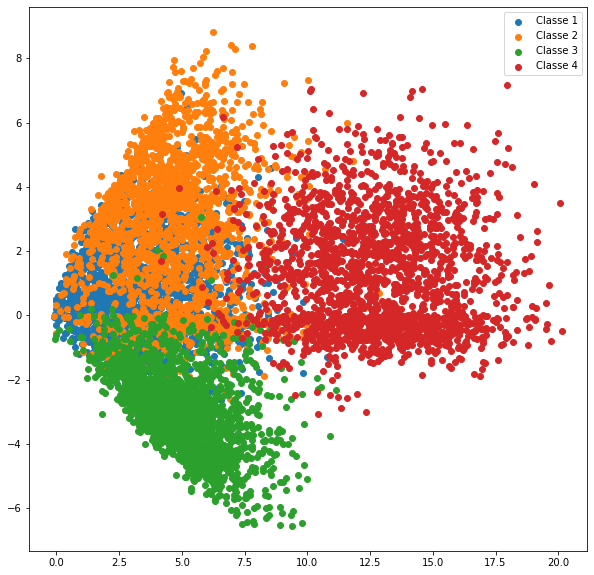

In [44]:
# plot the data
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(encoded_x1[:, 0][0:2000], encoded_x1[:, 1][0:2000], label='Classe 1')
ax.scatter(encoded_x2[:, 0][0:2000], encoded_x2[:, 1][0:2000], label='Classe 2')
ax.scatter(encoded_x3[:, 0][0:2000], encoded_x3[:, 1][0:2000], label='Classe 3')
ax.scatter(encoded_x4[:, 0][0:2000], encoded_x4[:, 1][0:2000], label='Classe 4')

ax.legend()
plt.show()

# Questão 6

Pesquise sobre redes neurais recorrentes LSTM. Apresente neste estudo aplicações das LSTM deep learning. Seguem abaixo sugestões de aplicações.

  1. Predição de series temporais (exemplo: predição de palavras no texto, ou predição de ações na bolsa de valores, etc.)
  2. Reconhecimento de voz
  3. Processamento de Linguagem Natural 
  4. Outra aplicações de livre escolha


As redes neurais LSTM (Long Short-Term Memory) são um tipo específico de redes neurais recorrentes que receberam muita atenção recentemente na comunidade de aprendizado de máquina. De forma geral, as redes LSTM possuem a característica de realimentação, o que permite um efeito de memória de curto e longo prazo. Com isso, a saída é modulada pelo estado dessas células, tornando-se uma propriedade muito importante quando precisamos que a previsão da rede neural dependa do contexto histórico das entradas, e não apenas da última entrada.

<center>
<img width="400" src="https://drive.google.com/uc?export=view&id=1-e-l4IwRiJelnwtXINOptEP_2AihpaCY">

Source: [Didática Tech](https://didatica.tech/lstm-long-short-term-memory/)

</center>



**Exemplo de uma aplicação**

Uma das aplicações das redes neurais LSTM é a predição de séries temporais, isto é, tentar prever o próximo valor a partir de valores anteriores. Assim, escolheu-se um problema onde, dado um ano e um mês, a tarefa é prever o número de passageiros de companhias aéreas internacionais em unidades de 1.000. Os dados variam de janeiro de 1949 a dezembro de 1960, ou 12 anos, com 144 observações.

Ou seja, dado o número de passageiros (em unidades de milhares) neste mês, qual é o número de passageiros no próximo mês?

Você pode escrever uma função simples para converter a única coluna de dados em um conjunto de dados de duas colunas: a primeira coluna contendo a contagem de passageiros deste mês (t) e a segunda coluna contendo a contagem de passageiros do próximo mês (t+1) a ser prevista.



In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [ ]:
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (96, 1)
Test shape:  (48, 1)


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.0431 - 2s/epoch - 24ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0229 - 224ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0163 - 212ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0148 - 232ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0140 - 217ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0130 - 217ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0121 - 217ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0112 - 226ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0104 - 211ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0094 - 220ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0084 - 211ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0074 - 219ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0066 - 221ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0057 - 217ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0050 - 214ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0043 - 214ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.68 RMSE
Test Score: 49.34 RMSE


In [ ]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [ ]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

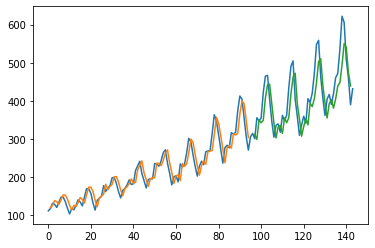

In [ ]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Questão 7

Apresente um estudo sobre transferência de conhecimento (transfer learning) no contexto de deep learning.

De acordo com Brownlee (2019), Transfer Learning é um método de aprendizagem de máquina no qual permite que um modelo treinado para uma determinada tarefa seja utilizado como um ponto de partida de um modelo para outro problema com características similares.

Esta técnica é bastante utilizada em tarefas de visão computacional, processamento de linguagem natural, dados os vastos recursos computacionais (principalmente as GPUs) e tempo necessários para desenvolver modelos de rede neural sobre esses problemas, além das emissões de CO2 causadas pelo gasto de energia. Além disso, é possível encontrar modelos treinados por grandes empresas por muitas horas e com uma grande infraestrutura disponíveis de forma gratuita na internet. Isso permite obter excelentes resultados com um tempo de treinamento muito menor do que seria treinar um novo modelo do zero.

É possível utilizar esta técnica a partir dos três passos a seguir:

1. **Selecione Modelo pré-treinado**: Escolha um modelo de origem pré-treinado dentre os modelos disponíveis. Muitas instituições de pesquisa lançam modelos em conjuntos de dados grandes e desafiadores que podem ser incluídos no conjunto de modelos candidatos a serem escolhidos.

2. **Modelo de Reutilização**: Utiliza o modelo pré-treinado como ponto de partida para um modelo na segunda tarefa de interesse. Isso pode envolver o uso de todo ou de partes do modelo, dependendo da técnica de modelagem utilizada.

3. **Modelo de sintonia**: Opcionalmente, o modelo pode precisar ser adaptado ou refinado nos dados do par de entrada-saída disponíveis para a tarefa de interesse. Assim, você pode adicionar mais camadas ao final da rede para adptar ao seu problema.

Exemplos de modelos pré-treinados na área de visão computacional:
  - [Oxford VGG Model](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)
  - [Google Inception Model](https://cloud.google.com/tpu/docs/inception-v3-advanced?hl=pt_br)
  - [Microsoft ResNet Model](https://github.com/KaimingHe/deep-residual-networks)

Exemplos de modelos pré-treinados na área de processamento de linguagem natural:
  - [Google’s word2vec Model](https://code.google.com/archive/p/word2vec/)
  - [Stanford’s GloVe Model](https://nlp.stanford.edu/projects/glove/)

# Referências:

  - Brownlee, Jason (2019). A Gentle Introduction to Transfer Learning for Deep Learning. Disponível em: https://machinelearningmastery.com/transfer-learning-for-deep-learning/ 